# Midterm 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is `100` points.
* You have `125` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Midterm 1` assignment on Canvas, where you downloaded this. (Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers,)
* and it should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `midterm_1_data.xlsx`

This file has sheets for...
* `stocks excess returns` - excess returns of the 14 biggest companies in the S&P.
* `proshares excess returns` - excess returns of ETFs and indexes from the Proshares case study.
* `fx carry excess returns` - excess returns from FX products.

Note the data is **monthly** for the first two sheets (stocks and proshares). Any annualizations for those two sheets should use `12` months in a year. Annualization for the third sheet (fx carry excess returns) is explained in section 4.

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 15     |
| 2       | 25     |
| 3       | 35     |
| 4       | 25     |

### Each numbered question is worth 5 points unless otherwise specified.

***

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.

#### (10pts)

In the mean-variance optimization of `homework 1`, suppose we found the mean excess return of TIPS is 4% annualized.

Explain--conceptually--how each of the following would have impacted the new (with TIPS) MV solution.
* TIPS is found to have correlation of 0% to `IEF` and 0% to SPY.
* TIPS is found to have correlation of 100% to `IEF`.

Would it be possible for TIPS to have been found to have 0% correlation to every other asset in `homework 1`? Explain.

1. TIPS is found to have correlation of 0% to `IEF` and 0% to SPY.

   - Uncorrelated assets reduce overall portfolio volatility ($\sigma_p$) without reducing the portfolio's expected return ($\mu_p$). Because volatility is subadditivity and return is additivity.
  
   - The efficient frontier would shift up and to the left.

2. TIPS is found to have correlation of 100% to `IEF`.

   - TIPS will substitute `IEF`

   - The efficient frontier would shift up, reduce the required volatility for a given level of return.

### 2. 

Depending on the application, one may or may not choose to include an intercept term in a linear factor decomposition of an asset’s returns. In what circumstances would I prefer to include an intercept, and in what circumstances would I not?

$$
\tilde{r_i} = \alpha + \beta \tilde{r_m} + \epsilon_i
$$

#### Include an Intercept ($\alpha$)

- Intercept term ($\alpha$) is the generated returns above what would be expected based on the systematic risk exposure
- Include an intercept when **measuring the performance of stock or portfolio compared to the market / factor**

#### Exclude an Intercept
- Exclude an intercept when the objective is to **determine the sensitivity of an asset to a factor / market** for hedging purpose
- Only interested in matching the fluctuation caused by the factor

***

# 2. Portfolio Allocation

For this question you will only use data from the sheet `stocks excess returns`.

It contains excess returns for the 14 largest stocks in the S&P.

In [ ]:
import sys
sys.path.append('..')

import pandas as pd
from midterm.module.utils import *

In [2]:
data = pd.read_excel("midterm_1_data.xlsx", sheet_name = "stocks excess returns").set_index("date")
data.head()

,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,TSLA,UNH,V,XOM
date,,,,,,,,,,,,,,
2012-06-30,0.010943,0.072609,0.050116,-0.001270,0.082263,0.077918,0.047953,0.050766,0.048052,0.111916,0.060768,0.052919,0.073267,0.088352
2012-07-31,0.045822,0.021677,0.018121,0.091196,0.024570,0.015958,0.026101,-0.301929,-0.036613,-0.020260,-0.123682,-0.126667,0.044002,0.014958
2012-08-31,0.093695,0.063985,-0.006075,0.082161,-0.017188,0.031486,0.031399,-0.168306,0.052556,0.036008,0.039935,0.062649,-0.004849,0.011533
2012-09-30,0.002878,0.024450,0.045849,0.101397,0.022030,0.090012,0.055749,0.199417,-0.034312,-0.049099,0.026730,0.024657,0.047099,0.047619
2012-10-31,-0.107527,-0.084192,-0.020903,-0.098271,0.027789,0.037321,0.025805,-0.025320,-0.040922,-0.101877,-0.039204,0.010720,0.033436,-0.002989


### 1.

Calculate the tangency portfolio from the start of the sample to December of 2018 (to 2018-12-31), which we call in-sample period. Use the following methods:
- Traditional tangency portfolio.
- Regularized tangency portfolio (divide by 2 every element outside of the diagonal in the covariance matrix prior to the calculation).

Return:
- The weights of each asset for the traditional tangency portfolio and the regularized tangency portfolio.
- The sum of absolute values of the weights for the traditional tangency portfolio and the regularized tangency portfolio:

$$
\sum_{i=1}^{n} |w_i|
$$


In [3]:
sample_2018 = data.loc[:"2018-12-31"]
sample_2018.tail()

,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,TSLA,UNH,V,XOM
date,,,,,,,,,,,,,,
2018-08-31,0.198654,0.130596,0.053066,0.001964,0.021380,-0.004987,0.073365,0.016484,0.061225,0.145147,0.010038,0.058417,0.074075,-0.008063
2018-09-30,-0.009691,-0.006212,0.024436,-0.021456,0.024450,-0.016574,0.014324,-0.065520,0.016773,-0.000176,-0.123678,-0.007058,0.020397,0.059109
2018-10-31,-0.032219,-0.203933,-0.042982,-0.098255,0.011431,-0.028829,0.008789,-0.078781,-0.067843,-0.251510,0.272270,-0.019370,-0.083292,-0.064550
2018-11-30,-0.183066,0.055803,0.061265,0.015618,0.054175,0.018036,0.097701,-0.075523,0.040816,-0.225918,0.037145,0.078136,0.027979,0.005987
2018-12-31,-0.118704,-0.113355,-0.066430,-0.060303,-0.123517,-0.124049,-0.026618,-0.069711,-0.086053,-0.185142,-0.052451,-0.116592,-0.070949,-0.144270


In [10]:
tangencyWeights = Calc_TangencyWeights(sample_2018, 12)
regWeights = Calc_RegWeights(sample_2018, 12)

result1 = pd.DataFrame({
    "Tangency Weights": tangencyWeights,
    "Regularized Weights": regWeights
}, index = sample_2018.columns)
print(result1)

print(f"\nSum of Tangency Weights: {tangencyWeights.sum():.4f}")
print(f"Sum of Regularized Weights: {regWeights.sum():.4f}")

       Tangency Weights  Regularized Weights
AAPL          -0.127836            -0.014706
AMZN          -0.040576             0.036310
BRK-B          0.131333             0.109162
GOOGL          0.025968             0.050545
JNJ            0.130408             0.099190
JPM           -0.013929             0.053691
LLY            0.352670             0.214949
META           0.030541             0.034896
MSFT           0.137917             0.089970
NVDA           0.163501             0.071696
TSLA           0.030066             0.036511
UNH            0.290230             0.189845
V              0.306209             0.184558
XOM           -0.416502            -0.156617

Sum of Tangency Weights: 1.0000
Sum of Regularized Weights: 1.0000


### 2.

Calculate the annualized summary statistics (mean, Sharpe, vol) of both portfolios in-sample.


In [19]:
mean_tangency, std_tangency, sharpe_tangency = Calc_MeanStdSharpe_Portfolio(sample_2018, tangencyWeights, 12)
mean_reg, std_reg, sharpe_reg = Calc_MeanStdSharpe_Portfolio(sample_2018, regWeights, 12)

result2 = pd.DataFrame({
    "Mean": [mean_tangency, mean_reg],
    "Volatility": [std_tangency, std_reg],
    "Sharpe": [sharpe_tangency, sharpe_reg]
}, index = ["Tangency", "Regularized"])
result2

,Mean,Volatility,Sharpe
Tangency,0.348256,0.134053,2.597896
Regularized,0.276599,0.114184,2.422392


### 3.

Use the weights calculated in question (2.2) to produce portfolio returns out-of-sample for both the Traditional and Regularized portfolio (from January 2019 onwards). 

Report the **last 3 returns** of both portfolios in the out-of-sample (the traditional tangency portfolio and the regularized tangency portfolio).

In [17]:
sample_oos = data.loc["2019-01-01":]
sample_oos.head()

,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,TSLA,UNH,V,XOM
date,,,,,,,,,,,,,,
2019-01-31,0.052706,0.141869,0.004213,0.075000,0.028780,0.066396,0.033328,0.269121,0.025710,0.074331,-0.079912,0.082170,0.020820,0.072196
2019-02-28,0.043164,-0.047519,-0.022242,-0.001027,0.031947,0.006696,0.057743,-0.033049,0.075744,0.072606,0.040273,-0.105166,0.097406,0.088826
2019-03-31,0.094805,0.083715,-0.004257,0.042465,0.020833,-0.032213,0.025256,0.030235,0.050533,0.161788,-0.127330,0.022483,0.052262,0.020176
2019-04-30,0.054533,0.079956,0.076847,0.016850,0.008183,0.153269,-0.099930,0.158335,0.105440,0.006117,-0.149012,-0.059292,0.050853,-0.008339
2019-05-31,-0.126642,-0.081042,-0.091442,-0.079546,-0.067249,-0.089374,-0.006270,-0.084797,-0.051910,-0.253177,-0.226695,0.035028,-0.019773,-0.110785


In [20]:
mean_tangency, std_tangency, sharpe_tangency = Calc_MeanStdSharpe_Portfolio(sample_oos, tangencyWeights, 12)
mean_reg, std_reg, sharpe_reg = Calc_MeanStdSharpe_Portfolio(sample_oos, regWeights, 12)

result3 = pd.DataFrame({
    "Mean": [mean_tangency, mean_reg],
    "Volatility": [std_tangency, std_reg],
    "Sharpe": [sharpe_tangency, sharpe_reg]
}, index = ["Tangency", "Regularized"])
result3

,Mean,Volatility,Sharpe
Tangency,0.321558,0.222352,1.446167
Regularized,0.268686,0.176334,1.523729


In [23]:
oos_tangency_returns = sample_oos @ tangencyWeights
oos_reg_returns = sample_oos @ regWeights
print(f"Last 3 returns of Tangency Portfolio: {oos_tangency_returns.iloc[-3]:.4f}, {oos_tangency_returns.iloc[-2]:.4f}, {oos_tangency_returns.iloc[-1]:.4f}")
print(f"Last 3 returns of Regularized Portfolio: {oos_reg_returns.iloc[-3]:.4f}, {oos_reg_returns.iloc[-2]:.4f}, {oos_reg_returns.iloc[-1]:.4f}")

Last 3 returns of Tangency Portfolio: -0.0160, 0.1012, -0.0252
Last 3 returns of Regularized Portfolio: 0.0032, 0.0646, -0.0165


### 4.

Report the annualized summary statistics (Mean, Vol and Sharpe) of both portfolios in the out-of-sample.

Note: you are using the weights optimized for the in-sample and generating statistics with the out-of-sample returns.

In [24]:
mean_tangency, std_tangency, sharpe_tangency = Calc_MeanStdSharpe_Portfolio(sample_oos, tangencyWeights, 12)
mean_reg, std_reg, sharpe_reg = Calc_MeanStdSharpe_Portfolio(sample_oos, regWeights, 12)

result3 = pd.DataFrame({
    "Mean": [mean_tangency, mean_reg],
    "Volatility": [std_tangency, std_reg],
    "Sharpe": [sharpe_tangency, sharpe_reg]
}, index = ["Tangency", "Regularized"])
result3

,Mean,Volatility,Sharpe
Tangency,0.321558,0.222352,1.446167
Regularized,0.268686,0.176334,1.523729


### 5.
Which portfolio has better adjusted by risk returns in the out-of-sample? Could there be a mathematical/optimization reason why one portfolio had better adjusted by risk performance? 

Relate your answer to your findings in question (2.2) (Sum of absolute weights in the traditional and regularized tangency portfolio.)

- Regularized Portfolio has better OOS performance


***

# 3. Hedging and Replication

For this question you will only use data from the sheet `proshares returns`.

The following assets excess returns are available in this sheet:

- **HDG US Equity**: ProShares Hedge Replication ET
- **QAI US Equity**: NYLI Hedge Multi-Strategy Trac
- **SPY US Equity**: SPDR S&P 500 ETF Trust
- **EEM US Equity**: iShares MSCI Emerging Markets
- **EFA US Equity**: iShares MSCI EAFE ETF
- **EUO US Equity**: ProShares UltraShort Euro
- **IWM US Equity**: iShares Russell 2000 ETF
- **SPXU US Equity**: ProShares UltraPro Short S&P 5
- **UPRO US Equity**: ProShares UltraPro S&P 500

In [25]:
data = pd.read_excel("midterm_1_data.xlsx", sheet_name = "proshares excess returns").set_index("date")
data.head()

,HDG US Equity,QAI US Equity,SPY US Equity,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,SPXU US Equity,UPRO US Equity
date,,,,,,,,,
2011-08-31,-0.027036,-0.006489,-0.054976,-0.092549,-0.087549,-0.005889,-0.088913,0.056476,-0.210854
2011-09-30,-0.032466,-0.022141,-0.069420,-0.179063,-0.108082,0.142180,-0.111505,0.190006,-0.207003
2011-10-31,0.050531,0.025239,0.109147,0.162986,0.096274,-0.069502,0.151011,-0.298828,0.326066
2011-11-30,-0.028608,-0.007964,-0.004064,-0.019724,-0.021765,0.054627,-0.003784,-0.035515,-0.033502
2011-12-31,0.012875,0.001822,0.010449,-0.042649,-0.021744,0.075581,0.005144,-0.051986,0.022939


### 1. 

You work at a hedge fund.

Suppose the hedge fund is long $1 million of HDG and wants to hedge the position.

A junior analyst suggests that we can hedge our position by looking at some select ETFs, and then taking a position in the ETFs that will offset the risk of our HDG position.

They pick QAI, SPY, EEM, UPRO, SPXU, IWM, and EFA.

What dollar position would we be taking in each ETF to hedge your HDG position?

In [ ]:
tickers = ['QAI US Equity', 'SPY US Equity', 'EEM US Equity', 'EFA US Equity', 'IWM US Equity', 'SPXU US Equity', 'UPRO US Equity']
y = data['HDG US Equity']

Beta, Treynor_Ratio, Information_Ratio, Rsquared, Tracking_Error, Model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, data[tickers], 12)

result4 = pd.DataFrame({
    "Hedging position ($)": Beta * 1000000 * -1 # Hedging
}, index = tickers)
result4

,Hedging position ($)
QAI US Equity,-151537.448542
SPY US Equity,-515376.353192
EEM US Equity,-44816.294871
EFA US Equity,-117000.288623
IWM US Equity,-139036.207774
SPXU US Equity,-32654.030196
UPRO US Equity,140222.469367


### 2.

#### (7pts)
What is the gross notional of the hedge?

What is the R-squared of the hedge?

What do these two statistics indicate about the practical use of this hedge?

In [37]:
print(f"Gross notional: {result4["Hedging position ($)"].sum() * -1}")
print(f"R Squared: {Rsquared}")


Gross notional: 860198.1538320649
R Squared: 0.9128835765562017


### 3.

Suppose instead we don't want to hedge our position. We believe that the value of HDG can be *entirely* determined by some combination of the other ETFs. 

So, you propose the following model:

$$
HDG_t = \beta_1 QAI_t + \beta_2 SPY_t + \beta_3 EEM_t + \varepsilon_t
$$

We think any difference between the value of HDG and the value of the ETFs is a mispricing, and will revert to 0 in the future. We call such a strategy "trading the residuals".

Therefore, if $\varepsilon_t > 0$, we should be short HDG and long the basket, and if $\varepsilon_t < 0$, we should be long HDG and short the basket.

Now...
* Run the model specified above and report the $\beta$'s values.
* After, create the "basket" portfolio, using the $\beta$'s as weights (they do not need to add up to one). Report the final three values.

In [45]:
tickers = ['QAI US Equity', 'SPY US Equity', 'EEM US Equity']
y = data['HDG US Equity']
x = data[tickers]

model = sm.OLS(y, x).fit()
results = pd.DataFrame({
    "Beta": model.params
}, index = tickers)
results

,Beta
QAI US Equity,0.356368
SPY US Equity,0.162696
EEM US Equity,0.086523


In [48]:
value = data[tickers] @ model.params
print(f"Last 3 values: {value.iloc[-3]}, {value.iloc[-2]}, {value.iloc[-1]}")

Last 3 values: 0.006721093504999596, 0.007373145129900802, 0.013569142198290043


### 4.

#### (8pts)

Construct the strategy indicated by the approach in the previous problem.

For a given period $t$:
- if the $\varepsilon_t \leq 0$ (is negative or equal to 0), you should be long HDG 200% in HDG and short 100% in the basket portfolio **in period $t+1$**.
- if the $\varepsilon_t > 0$ (is positive), you should be long 200% in the basket portfolio and short 100% **in HDG in period $t+1$**.

Do not worry about the look forward bias: in this scenario, you should run the model only once with the entire dataset and define your $\varepsilon_t$ for any $t$ also considering the model that has acess to data in $t+1, t+2, ...$ to make the calculation.  

Report the annualized summary statistics of this strategy (Mean, Vol and Sharpe).

In [51]:
strategyResult = list()
portfolio = data[tickers] @ model.params
residual = data['HDG US Equity'] - portfolio

for index, r in enumerate(residual):
    if r <= 0:
        returns = 2 * data['HDG US Equity'].iloc[index] - portfolio.iloc[index]
    else:
        returns = 2 * portfolio.iloc[index] - data['HDG US Equity'].iloc[index]
    
    strategyResult.append(returns)

mean, std, sharpe = Calc_MeanStdSharpe_Stock(pd.Series(strategyResult), 12)
print(f"Strategy Mean: {mean}; STD: {std}; Sharpe: {sharpe}")

Strategy Mean: -0.062050558114605026; STD: 0.057586088605728974; Sharpe: -1.0775268752743854


### 5.

On a different matter, we are now studying QAI and want to track (replicate) it using the other available ETFs.

Use an intercept and report:

- $\beta$ (and the sum of $\beta$'s absolute value).
- $\alpha$ and Information Ratio.
- $R^2$.
- Correlation matrix between the assets used to replicate QAI.

In [56]:
y = data["QAI US Equity"]
x = data.drop(columns = "QAI US Equity")

Beta, Treynor_Ratio, Information_Ratio, Rsquared, Tracking_Error, Model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, 12)
result5 = pd.DataFrame({
    "Beta": Beta
}, index = x.columns)
result5

,Beta
HDG US Equity,0.231451
SPY US Equity,0.565072
EEM US Equity,0.047792
EFA US Equity,0.032642
EUO US Equity,-0.020484
IWM US Equity,-0.000157
SPXU US Equity,0.051074
UPRO US Equity,-0.095099


Alpha: -0.0005246832772640223
Information Ratio: -0.3167264726767731
R Squared: 0.8419884087094259


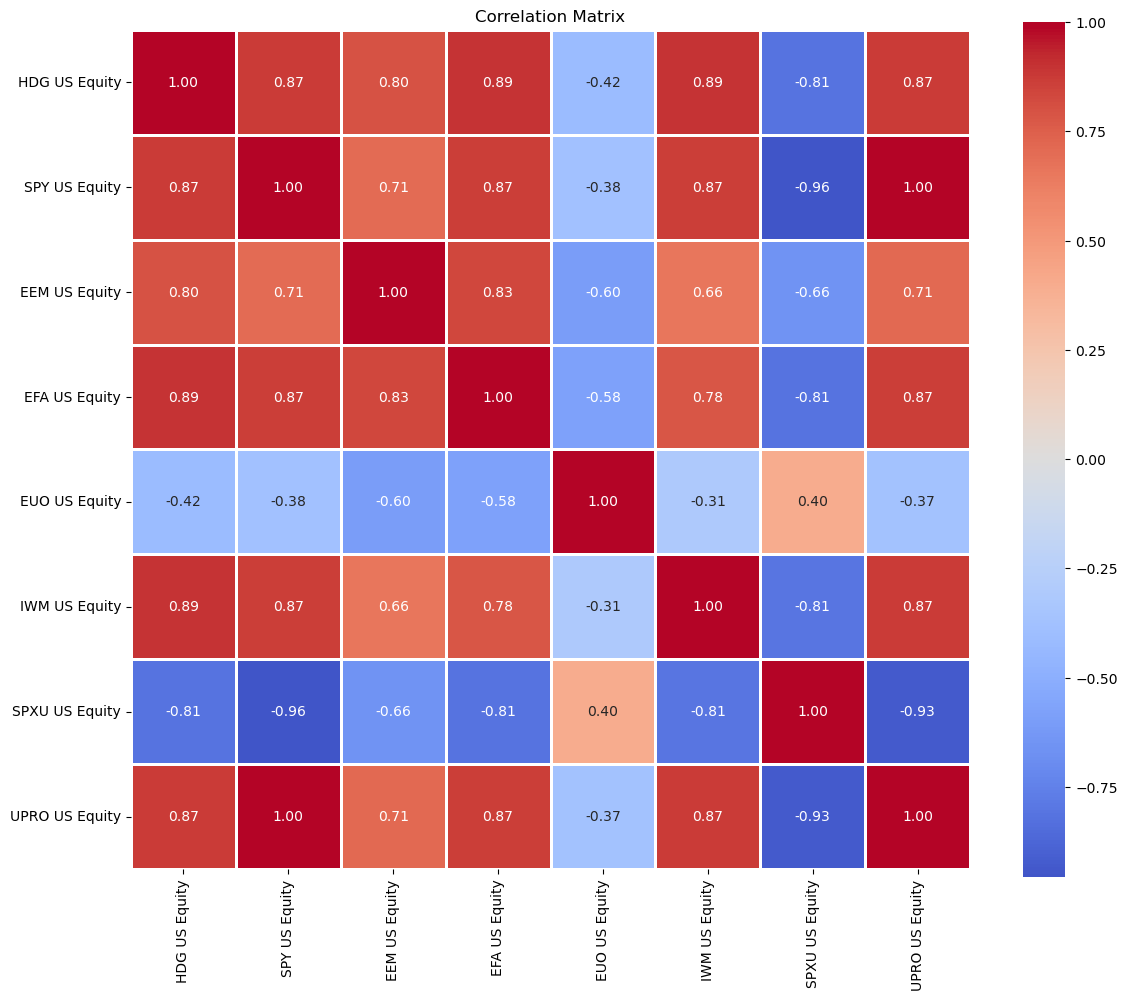

In [57]:
print(f"Alpha: {Model.params["const"]}")
print(f"Information Ratio: {Information_Ratio}")
print(f"R Squared: {Rsquared}")
Plot_CorrHeatmap(x)

### 6.

Explain how good is your replication, pointing out at least one good or bad argument related to each of the statistics mentioned in the bullet points above (thus, you should have at least 4 arguments).

***

# 4. 

The data in sheet `fx carry excess returns` has **excess** daily returns for trading currencies.
* You **do NOT need** to know anything about FX, currency, or the underlying strategies.
* Rather, just take these return series as given.

For the problems below, we will **only use** the `JPY` series.

### 1.

Calculate the `1%` VaR as follows...

Empirical VaR:
* At every point in time, calculate the `1st` quantile of the returns up to that point.
* No need to scale the answers.
  
Report the VaR for the final date of the sample.

### 2.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* rolling volatility.
* using a window of `233` days.
* without using a sample mean.

Report the VaR for the final `3 days` of the sample.

### 3.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* EWMA volatility
* using $\lambda = 0.94$.
* without using a sample mean.

Report the VaR for the final `3 days` of the sample.

### 4.

Make a plot of the three timeseries of your VaR estimates.

Succinctly point out the pros / cons of these approaches.

### 5.

What statistic do we use to judge the performance of a VaR model?

Estimate and report this statistic across the VaR methods.

Which VaR model do you find is best?

***